# project 2
# Dynamic price clustering 
## Machine learning
## Unsupervised learning(clustering)
###  models (kmeans, hirachical clustering)
### About data : Price quote data and item indices that underpin consumer price inflation statistics are now published, giving users unprecedented access to the detailed data that are used in the construction of the UK's inflation figures. With effect from the January 2017 consumer price inflation publication, these data are published on a monthly basis showing the latest month.
### Goal : At least a 90% accuracy
### evaluation : sillhout score

In [1]:
# lets load this data
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("upload-pricequotes202301.csv")
data.head()

,QUOTE_DATE,ITEM_ID,ITEM_DESC,VALIDITY,SHOP_CODE,PRICE,INDICATOR_BOX,ORIG_INDICATOR_BOX,PRICE_RELATIVE,LOG_PRICE_RELATIVE,STRATUM_WEIGHT,STRATUM_TYPE,START_DATE,END_DATE,REGION,SHOP_TYPE,SHOP_WEIGHT,BASE_PRICE,BASE_VALIDITY,STRATUM_CELL
0,202301,210102,LGE LOAF-WHTE-UNSLED-750-800G,3,801,1.30,NaN,NaN,1.130,0.123,11.92,1,202202,999999,2,1,1,1.150,3,2
1,202301,210102,LGE LOAF-WHTE-UNSLED-750-800G,3,802,2.00,NaN,NaN,1.429,0.357,11.92,1,202202,999999,2,1,1,1.400,3,2
2,202301,210102,LGE LOAF-WHTE-UNSLED-750-800G,3,803,1.25,NaN,NaN,1.087,0.083,11.92,1,202202,999999,2,1,1,1.150,3,2
3,202301,210102,LGE LOAF-WHTE-UNSLED-750-800G,3,807,1.30,NaN,NaN,1.153,0.142,11.92,1,202204,999999,2,1,2,1.128,4,2
4,202301,210102,LGE LOAF-WHTE-UNSLED-750-800G,3,808,1.25,NaN,NaN,1.087,0.083,11.92,1,202202,999999,2,1,2,1.150,3,2


### EDA(exploratory data anslysis)

In [3]:
data.head()

,QUOTE_DATE,ITEM_ID,ITEM_DESC,VALIDITY,SHOP_CODE,PRICE,INDICATOR_BOX,ORIG_INDICATOR_BOX,PRICE_RELATIVE,LOG_PRICE_RELATIVE,STRATUM_WEIGHT,STRATUM_TYPE,START_DATE,END_DATE,REGION,SHOP_TYPE,SHOP_WEIGHT,BASE_PRICE,BASE_VALIDITY,STRATUM_CELL
0,202301,210102,LGE LOAF-WHTE-UNSLED-750-800G,3,801,1.30,NaN,NaN,1.130,0.123,11.92,1,202202,999999,2,1,1,1.150,3,2
1,202301,210102,LGE LOAF-WHTE-UNSLED-750-800G,3,802,2.00,NaN,NaN,1.429,0.357,11.92,1,202202,999999,2,1,1,1.400,3,2
2,202301,210102,LGE LOAF-WHTE-UNSLED-750-800G,3,803,1.25,NaN,NaN,1.087,0.083,11.92,1,202202,999999,2,1,1,1.150,3,2
3,202301,210102,LGE LOAF-WHTE-UNSLED-750-800G,3,807,1.30,NaN,NaN,1.153,0.142,11.92,1,202204,999999,2,1,2,1.128,4,2
4,202301,210102,LGE LOAF-WHTE-UNSLED-750-800G,3,808,1.25,NaN,NaN,1.087,0.083,11.92,1,202202,999999,2,1,2,1.150,3,2


In [4]:
# Checking missing values
data.isna().sum()

QUOTE_DATE                0
ITEM_ID                   0
ITEM_DESC                 0
VALIDITY                  0
SHOP_CODE                 0
PRICE                     0
INDICATOR_BOX         96555
ORIG_INDICATOR_BOX    97816
PRICE_RELATIVE            0
LOG_PRICE_RELATIVE        0
STRATUM_WEIGHT            0
STRATUM_TYPE              0
START_DATE                0
END_DATE                  0
REGION                    0
SHOP_TYPE                 0
SHOP_WEIGHT               0
BASE_PRICE                0
BASE_VALIDITY             0
STRATUM_CELL              0
dtype: int64

In [5]:
# Checking data types
data.dtypes

QUOTE_DATE              int64
ITEM_ID                 int64
ITEM_DESC              object
VALIDITY                int64
SHOP_CODE               int64
PRICE                 float64
INDICATOR_BOX          object
ORIG_INDICATOR_BOX     object
PRICE_RELATIVE        float64
LOG_PRICE_RELATIVE    float64
STRATUM_WEIGHT        float64
STRATUM_TYPE            int64
START_DATE              int64
END_DATE                int64
REGION                  int64
SHOP_TYPE               int64
SHOP_WEIGHT             int64
BASE_PRICE            float64
BASE_VALIDITY           int64
STRATUM_CELL            int64
dtype: object

#### As it is there 3 columns with string object dtypes that needs to be converted to number(ORIG_INDICATOR_BOX, INDICATOR_BOX, ITEM_DESC)
#### Also two columns with missing values(INDICATOR_BOX, ORIG_INDICATOR_BOX)#

In [6]:
# printing string object names
for label, content in data.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

ITEM_DESC
INDICATOR_BOX
ORIG_INDICATOR_BOX


In [7]:
# converting object to category
for label, content in data.items():
    if not pd.api.types.is_numeric_dtype(content):
        data[label] = content.astype('category').cat.as_ordered()


data.dtypes

QUOTE_DATE               int64
ITEM_ID                  int64
ITEM_DESC             category
VALIDITY                 int64
SHOP_CODE                int64
PRICE                  float64
INDICATOR_BOX         category
ORIG_INDICATOR_BOX    category
PRICE_RELATIVE         float64
LOG_PRICE_RELATIVE     float64
STRATUM_WEIGHT         float64
STRATUM_TYPE             int64
START_DATE               int64
END_DATE                 int64
REGION                   int64
SHOP_TYPE                int64
SHOP_WEIGHT              int64
BASE_PRICE             float64
BASE_VALIDITY            int64
STRATUM_CELL             int64
dtype: object

In [8]:
# turning to numeric and filling missing values in the procees 
for label , content in data.items():
    if not pd.api.types.is_numeric_dtype(content):
        
        data[label] = pd.Categorical(content).codes +1

#visualising the data types
data.dtypes

QUOTE_DATE              int64
ITEM_ID                 int64
ITEM_DESC               int16
VALIDITY                int64
SHOP_CODE               int64
PRICE                 float64
INDICATOR_BOX            int8
ORIG_INDICATOR_BOX       int8
PRICE_RELATIVE        float64
LOG_PRICE_RELATIVE    float64
STRATUM_WEIGHT        float64
STRATUM_TYPE            int64
START_DATE              int64
END_DATE                int64
REGION                  int64
SHOP_TYPE               int64
SHOP_WEIGHT             int64
BASE_PRICE            float64
BASE_VALIDITY           int64
STRATUM_CELL            int64
dtype: object

All data types are now numeric(🗿)

In [9]:
# checkingb for missing values
data.isna().sum()

QUOTE_DATE            0
ITEM_ID               0
ITEM_DESC             0
VALIDITY              0
SHOP_CODE             0
PRICE                 0
INDICATOR_BOX         0
ORIG_INDICATOR_BOX    0
PRICE_RELATIVE        0
LOG_PRICE_RELATIVE    0
STRATUM_WEIGHT        0
STRATUM_TYPE          0
START_DATE            0
END_DATE              0
REGION                0
SHOP_TYPE             0
SHOP_WEIGHT           0
BASE_PRICE            0
BASE_VALIDITY         0
STRATUM_CELL          0
dtype: int64

NO more missing values (feeling cool🗿🗿)

### Lets visualise the correlation of features

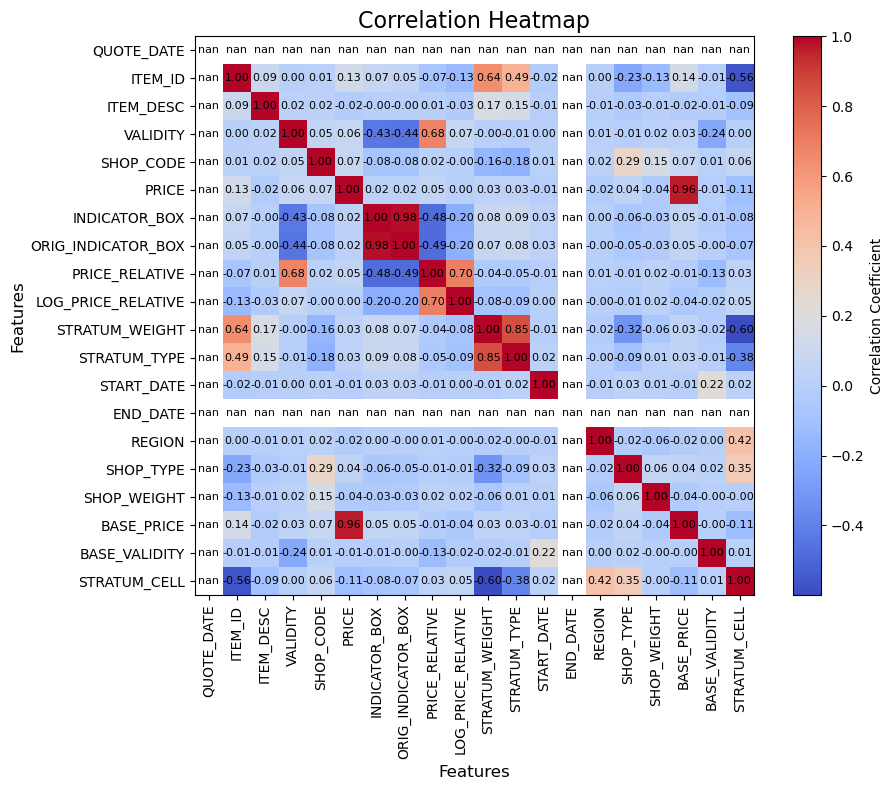

In [10]:
# ploting a correlation matrix
import matplotlib.pyplot as plt
corr_mat = data.corr()
plt.figure(figsize=(10, 8))  # Set the figure size
plt.imshow(corr_mat, cmap='coolwarm',interpolation='none')
plt.colorbar(label='Correlation Coefficient')

# input labels 
plt.xticks(range(len(corr_mat.columns)), corr_mat.columns, rotation=90)
plt.yticks(range(len(corr_mat.columns)), corr_mat.columns)
for i in range(len(corr_mat.columns)):
    for j in range(len(corr_mat.columns)):
        plt.text(j, i, f'{corr_mat.iloc[i, j]:.2f}', 
                 ha='center', va='center', color='black', fontsize=8)


# insert tittle and axis
plt.title('Correlation Heatmap', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features', fontsize=12)

# show the heatmap
plt.tight_layout()  # arrange layout for better fit
plt.show()

##### End date , Quote date has no correlation so hey can be both droped and will be
finalise Data cleaning process(👍)

Just realised we have a data time column lets make it clean

In [11]:
# converting to Datetime dtype
data["START_DATE"] = pd.to_datetime(data["START_DATE"], format='%Y%m')
data["QUOTE_DATE"] = pd.to_datetime(data["QUOTE_DATE"], format='%Y%m')

# sorting data by sales date 
data.sort_values(by = "START_DATE", inplace = True, ascending = True )

#visualise the data
data.head()

,QUOTE_DATE,ITEM_ID,ITEM_DESC,VALIDITY,SHOP_CODE,PRICE,INDICATOR_BOX,ORIG_INDICATOR_BOX,PRICE_RELATIVE,LOG_PRICE_RELATIVE,STRATUM_WEIGHT,STRATUM_TYPE,START_DATE,END_DATE,REGION,SHOP_TYPE,SHOP_WEIGHT,BASE_PRICE,BASE_VALIDITY,STRATUM_CELL
0,2023-01-01,210102,323,3,801,1.3,0,0,1.130,0.123,11.92,1,2022-02-01,999999,2,1,1,1.15,3,2
87961,2023-01-01,440126,538,3,16931,550.0,0,0,1.000,0.000,7.74,1,2022-02-01,999999,5,2,1,550.00,3,5
87960,2023-01-01,440126,538,3,16886,650.0,0,0,1.182,0.167,7.74,1,2022-02-01,999999,5,2,1,550.00,3,5
87959,2023-01-01,440126,538,3,15602,450.0,0,0,1.000,0.000,7.74,1,2022-02-01,999999,5,2,1,450.00,3,5
87958,2023-01-01,440126,538,3,5053,420.0,0,0,1.000,0.000,7.74,1,2022-02-01,999999,5,2,1,420.00,3,5


In [12]:
# check data type
data.dtypes

QUOTE_DATE            datetime64[ns]
ITEM_ID                        int64
ITEM_DESC                      int16
VALIDITY                       int64
SHOP_CODE                      int64
PRICE                        float64
INDICATOR_BOX                   int8
ORIG_INDICATOR_BOX              int8
PRICE_RELATIVE               float64
LOG_PRICE_RELATIVE           float64
STRATUM_WEIGHT               float64
STRATUM_TYPE                   int64
START_DATE            datetime64[ns]
END_DATE                       int64
REGION                         int64
SHOP_TYPE                      int64
SHOP_WEIGHT                    int64
BASE_PRICE                   float64
BASE_VALIDITY                  int64
STRATUM_CELL                   int64
dtype: object

In [13]:
# Seperating year from month
data["START_month"]=data["START_DATE"].dt.month
data["START_year"]=data["START_DATE"].dt.year
data["QUOTE_month"]=data["QUOTE_DATE"].dt.month
data["QUOTE_year"]=data["QUOTE_DATE"].dt.year
    

In [14]:
# DROPPING ["START_DATE", "QUOTE_DATE"] BECAUSE we no longer have use for them
data.drop(["START_DATE", "QUOTE_DATE"], axis=1, inplace=True)
data.head()

,ITEM_ID,ITEM_DESC,VALIDITY,SHOP_CODE,PRICE,INDICATOR_BOX,ORIG_INDICATOR_BOX,PRICE_RELATIVE,LOG_PRICE_RELATIVE,STRATUM_WEIGHT,...,REGION,SHOP_TYPE,SHOP_WEIGHT,BASE_PRICE,BASE_VALIDITY,STRATUM_CELL,START_month,START_year,QUOTE_month,QUOTE_year
0,210102,323,3,801,1.3,0,0,1.130,0.123,11.92,...,2,1,1,1.15,3,2,2,2022,1,2023
87961,440126,538,3,16931,550.0,0,0,1.000,0.000,7.74,...,5,2,1,550.00,3,5,2,2022,1,2023
87960,440126,538,3,16886,650.0,0,0,1.182,0.167,7.74,...,5,2,1,550.00,3,5,2,2022,1,2023
87959,440126,538,3,15602,450.0,0,0,1.000,0.000,7.74,...,5,2,1,450.00,3,5,2,2022,1,2023
87958,440126,538,3,5053,420.0,0,0,1.000,0.000,7.74,...,5,2,1,420.00,3,5,2,2022,1,2023


### visualise correlation after data cleaning

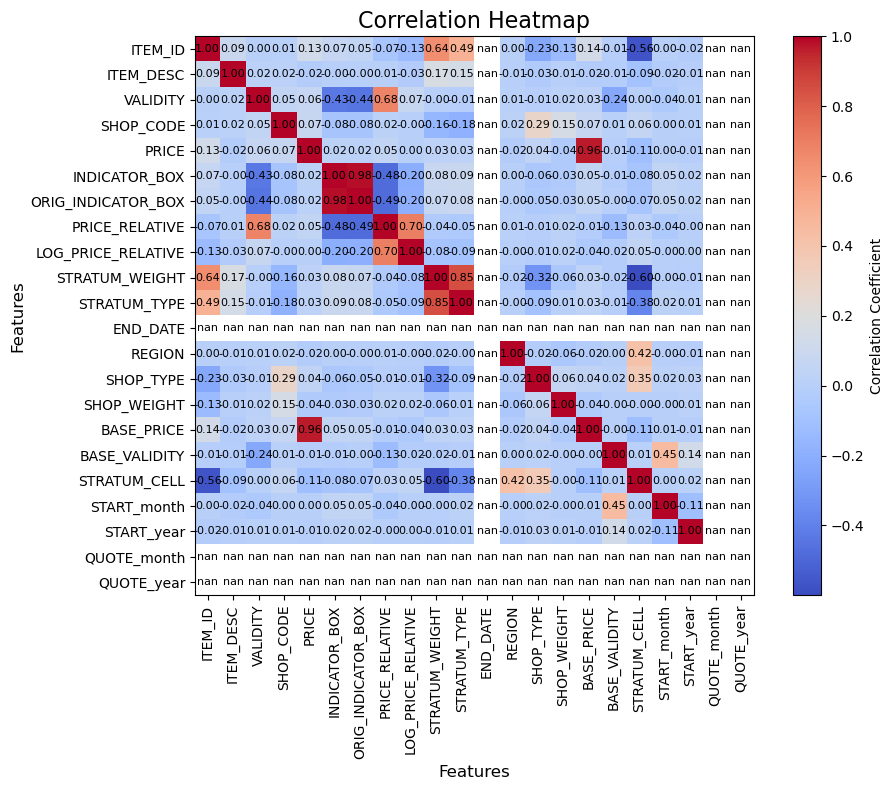

In [15]:
# ploting a correlation matrix
import matplotlib.pyplot as plt
corr_mat = data.corr()
plt.figure(figsize=(10, 8))  # Set the figure size
plt.imshow(corr_mat, cmap='coolwarm',interpolation='none')
plt.colorbar(label='Correlation Coefficient')

# input labels 
plt.xticks(range(len(corr_mat.columns)), corr_mat.columns, rotation=90)
plt.yticks(range(len(corr_mat.columns)), corr_mat.columns)
for i in range(len(corr_mat.columns)):
    for j in range(len(corr_mat.columns)):
        plt.text(j, i, f'{corr_mat.iloc[i, j]:.2f}', 
                 ha='center', va='center', color='black', fontsize=8)


# insert tittle and axis
plt.title('Correlation Heatmap', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features', fontsize=12)

# show the heatmap
plt.tight_layout()  # arrange layout for better fit
plt.show()

##### Looks like ["Start_year", "Start_month", "Quote_year","Quote_month", "End_date"] columns are not relevant for the cluster since they have 0 correlation with every other feature

In [16]:
# DROPPING ["QUOTE_year","QUOTE_month, END_DATE"] BECAUSE we no longer have use for them
data.drop(["QUOTE_year","QUOTE_month","END_DATE"], axis=1, inplace=True)
data.head()

,ITEM_ID,ITEM_DESC,VALIDITY,SHOP_CODE,PRICE,INDICATOR_BOX,ORIG_INDICATOR_BOX,PRICE_RELATIVE,LOG_PRICE_RELATIVE,STRATUM_WEIGHT,STRATUM_TYPE,REGION,SHOP_TYPE,SHOP_WEIGHT,BASE_PRICE,BASE_VALIDITY,STRATUM_CELL,START_month,START_year
0,210102,323,3,801,1.3,0,0,1.130,0.123,11.92,1,2,1,1,1.15,3,2,2,2022
87961,440126,538,3,16931,550.0,0,0,1.000,0.000,7.74,1,5,2,1,550.00,3,5,2,2022
87960,440126,538,3,16886,650.0,0,0,1.182,0.167,7.74,1,5,2,1,550.00,3,5,2,2022
87959,440126,538,3,15602,450.0,0,0,1.000,0.000,7.74,1,5,2,1,450.00,3,5,2,2022
87958,440126,538,3,5053,420.0,0,0,1.000,0.000,7.74,1,5,2,1,420.00,3,5,2,2022


In [17]:
# reviewing the data 
data.shape

(139419, 19)

In [18]:
data.shape

(139419, 19)

In [19]:
# reinstantiating cleaned data to df
df = data.copy()
df = pd.DataFrame(df)

In [20]:
# saving df to csv
df.to_csv("cleaned_proj_data.CSV", index=False)

In [21]:
# checking for best cluster with silhouste score 
from sklearn.cluster import KMeans
np.random.seed(42)
k = range(1,10)
score = []
for i in k:
    kmeans = KMeans(n_clusters=i, init="random", random_state=42)
    kmeans.fit(df)
    score.append(kmeans.inertia_)

## Visualizing the silhoute score

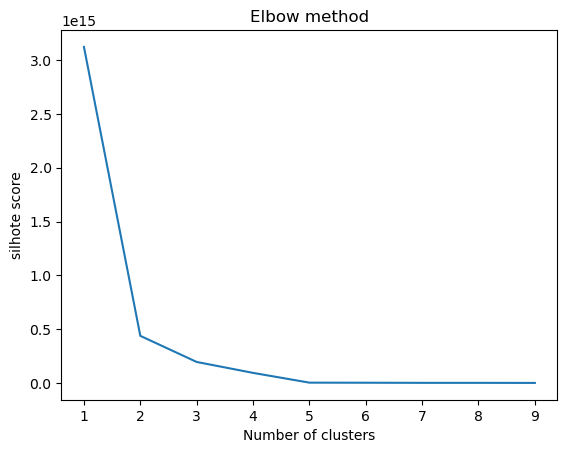

In [22]:
import matplotlib.pyplot as plt
plt.plot(k, score)
plt.title("Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("silhote score");

### Using the elbow methood the perfect number of clusters is 3 but before using it lets try Kneighbors cluster

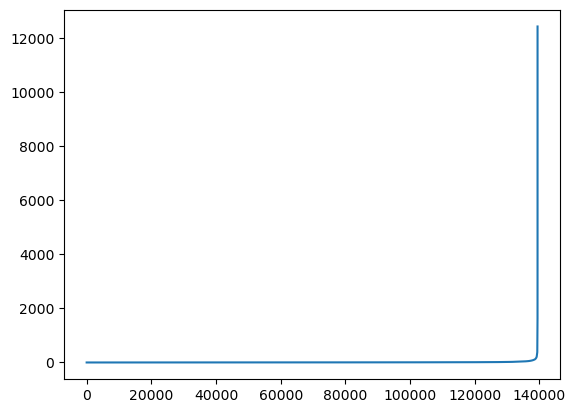

In [23]:
from sklearn.neighbors import NearestNeighbors
nib = NearestNeighbors(n_neighbors=3)
nbs = nib.fit(df)

distance,indicies = nbs.kneighbors(df)

distance = np.sort(distance, axis=0)
distance = distance[:, 1]
plt.plot(distance)

##### using neighbors iis confusing and the output is poor lets use Kmeans


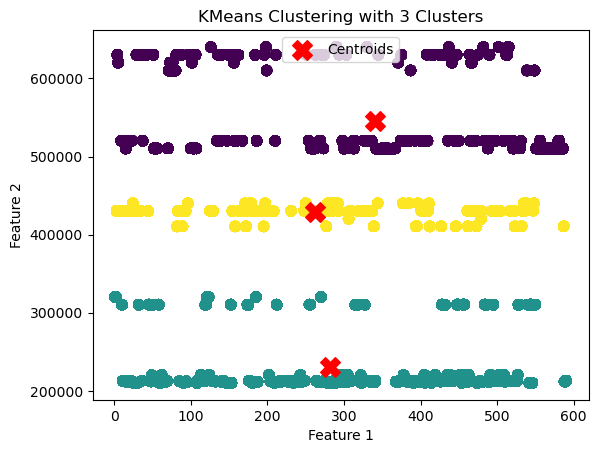

In [24]:
from sklearn.cluster import KMeans
X = df.values
km = KMeans(n_clusters=3)
km.fit(X)
cl = km.labels_
cl

# Plot clusters
plt.scatter(X[:, 1], X[:, 0], c=cl, cmap='viridis', s=50)
plt.scatter(km.cluster_centers_[:, 1], km.cluster_centers_[:, 0], c='red', marker='X', s=200, label='Centroids')
plt.title('KMeans Clustering with 3 Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


### it desnt looks too good so lets try dimensionality reduction with PCA and standar scaler

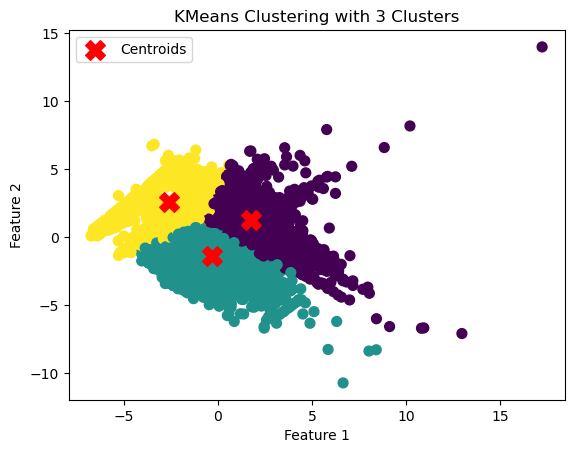

In [25]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
X = df.values
sc = StandardScaler()
pca = PCA(n_components=2)
sc_x = sc.fit_transform(X)
x_reduced = pca.fit_transform(sc_x)
km = KMeans(n_clusters=3)
km.fit(x_reduced)
cl = km.labels_
cl

# Plot clusters
plt.scatter(x_reduced[:, 1], x_reduced[:, 0], c=cl, cmap='viridis', s=50)
plt.scatter(km.cluster_centers_[:, 1], km.cluster_centers_[:, 0], c='red', marker='X', s=200, label='Centroids')
plt.title('KMeans Clustering with 3 Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

### using standard scaler made our clusters messy so i wont use it for this proj

#### the Data set looks more like there 5 clusters so lets change the number of clusters to find

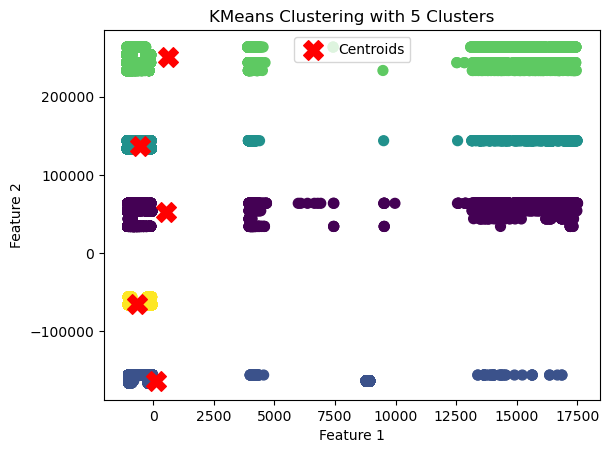

In [26]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

X = df.values

pca = PCA(n_components=2)
x_reduced = pca.fit_transform(X)
km = KMeans(n_clusters=5)
km.fit(x_reduced)
cl = km.labels_
cl

# Ploting and customisation
plt.scatter(x_reduced[:, 1], x_reduced[:, 0], c=cl, cmap='viridis', s=50)
plt.scatter(km.cluster_centers_[:, 1], km.cluster_centers_[:, 0], c='red', marker='X', s=200, label='Centroids')
plt.title('KMeans Clustering with 5 Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

### lets try 5 clusters without PCA

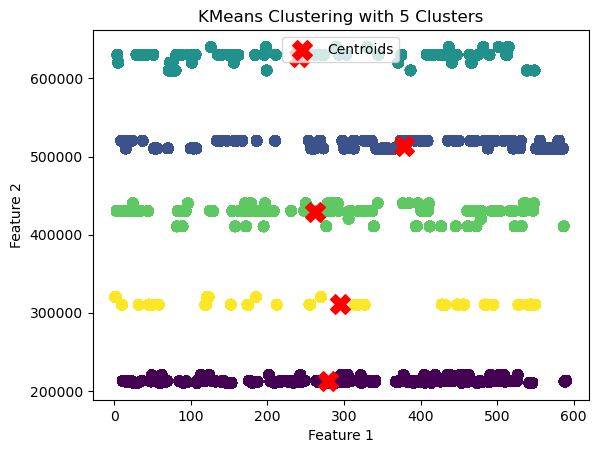

In [27]:
# plotting without PCA  but 5 clusters
from sklearn.cluster import KMeans

# making X equal the values in a dataframe
X = df.values
# instantiatin the model
km = KMeans(n_clusters=5)
# Fitting  x data to the model
km.fit(X)
# getting predictions
cl = km.labels_


# Plotting and customiszing the clusters
plt.scatter(X[:, 1], X[:, 0], c=cl, cmap='viridis', s=50)
plt.scatter(km.cluster_centers_[:, 1], km.cluster_centers_[:, 0], c='red', marker='X', s=200, label='Centroids')
plt.title('KMeans Clustering with 5 Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

### exploring clusters and predictions

In [28]:
# exploring clusters
df["class"] = km.labels_
df["class"].value_counts()

class
0    54466
1    36150
3    23658
2    13786
4    11359
Name: count, dtype: int64

#### exploring predictictions and clusters

In [29]:
df["VALIDITY"].value_counts()

VALIDITY
3    116437
1     12404
4     10409
2       169
Name: count, dtype: int64

In [30]:
df.head()

,ITEM_ID,ITEM_DESC,VALIDITY,SHOP_CODE,PRICE,INDICATOR_BOX,ORIG_INDICATOR_BOX,PRICE_RELATIVE,LOG_PRICE_RELATIVE,STRATUM_WEIGHT,STRATUM_TYPE,REGION,SHOP_TYPE,SHOP_WEIGHT,BASE_PRICE,BASE_VALIDITY,STRATUM_CELL,START_month,START_year,class
0,210102,323,3,801,1.3,0,0,1.130,0.123,11.92,1,2,1,1,1.15,3,2,2,2022,0
87961,440126,538,3,16931,550.0,0,0,1.000,0.000,7.74,1,5,2,1,550.00,3,5,2,2022,3
87960,440126,538,3,16886,650.0,0,0,1.182,0.167,7.74,1,5,2,1,550.00,3,5,2,2022,3
87959,440126,538,3,15602,450.0,0,0,1.000,0.000,7.74,1,5,2,1,450.00,3,5,2,2022,3
87958,440126,538,3,5053,420.0,0,0,1.000,0.000,7.74,1,5,2,1,420.00,3,5,2,2022,3


In [31]:
k = df[df["VALIDITY"]==1]
k["class"].value_counts()

class
0    4684
1    3126
3    2175
2    1671
4     748
Name: count, dtype: int64

In [33]:
# model evaluation
from sklearn.metrics import silhouette_score
silhouette_score(df,cl)

0.9442581320956612

## Putting everything together in 1 block of code

In [34]:
# importing libraries

# data procesing
import pandas as pd
import numpy as np 

# modellig  and evaluation
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# setting random seed
np.random.seed(42)

# loading the Data (i will be loading the cleaned data that was saved to CSV previusly)
df = pd.read_csv("cleaned_proj_data.CSV")

# instantiating the model 
model = KMeans(n_clusters=5)

# instantiating dimensionality reduction(PCA)
pca = PCA(n_components=2)

# creating Pipeline
pipeline = Pipeline([
    ("PCA", pca),
    ("estimator", model)
])
# fitting with data 
pipeline.fit(df)




Pipeline(steps=[('PCA', PCA(n_components=2)),
                ('estimator', KMeans(n_clusters=5))])

In [35]:
# making predictions
prd =pipeline.predict(df)
silhouette_score(df, prd)

0.9442581320727873

#### Normally a little hyper parameter tunning will improve the model but i am really stressed out i give up ML wins😊

### model is performing well so time to save pipline

In [36]:
import joblib
joblib.dump(pipeline,"cluster_model.pkl")

['cluster_model.pkl']

class
0    54466
1    36150
3    23658
2    13786
4    11359

In [38]:
def predict_product_class(featurs):
    import joblib
    model_1 = joblib.load("cluster_model.pkl")
    import numpy as np
    arr_features = np.array(featurs)
    prediction = model_1.predict(arr_features.reshape(1,-1))
    if prediction == 0:
        print(" very highly in demannd")
    elif prediction == 1:
        print("highly in demand")

    elif prediction==2:
        print("medium demand")

    elif prediction == 3:
        print("low in demand")

    else:
        print("very low in demand")

In [39]:
predict_product_class((440126,538,3,16255,560.0,0,0,1.077,0.074,7.74,1,5,1,1,520.0,3,5,2,2022))

medium demand


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


### Good Bye😊😊😊